     growth    sp        pft  height
0  0.641873  sp01  deciduous   14.14
1  0.751617  sp01  deciduous   17.53
2  1.068380  sp01  deciduous   25.66
3  0.855902  sp01  deciduous   18.63
4  0.997850  sp01  deciduous   23.33
           growth      height
count  100.000000  100.000000
mean     1.209420   17.457500
std      0.541971    4.616219
min      0.297853   10.180000
25%      0.795495   13.530000
50%      1.087865   16.760000
75%      1.445116   21.492500
max      2.615004   25.830000
['sp01' 'sp02' 'sp03' 'sp04' 'sp05' 'sp06' 'sp07' 'sp08' 'sp09' 'sp10']
['deciduous' 'evergreen']


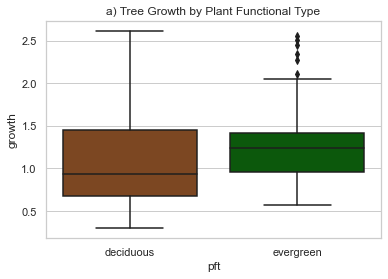

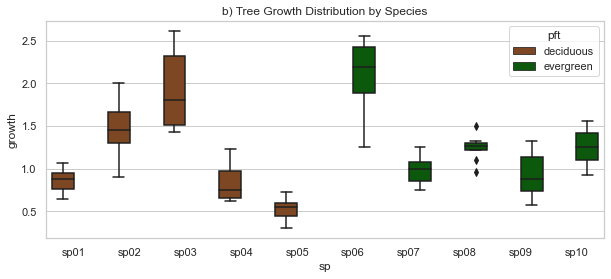

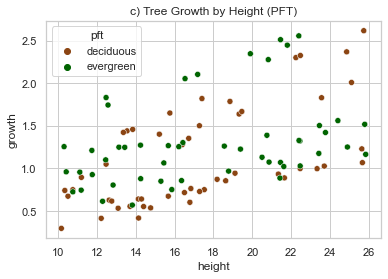

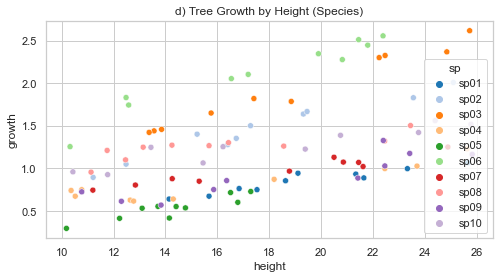

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.19
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           4.08e-07
Time:                        22:38:23   Log-Likelihood:                -64.970
No. Observations:                 100   AIC:                             135.9
Df Residuals:                      97   BIC:                             143.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1390    

C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Li

                Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      growth 
No. Observations:       100          Method:                  REML   
No. Groups:             10           Scale:                   0.0068 
Min. group size:        10           Log-Likelihood:          52.2946
Max. group size:        10           Converged:               No     
Mean group size:        10.0                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.121    0.104  1.160 0.246 -0.083  0.325
C(pft)[T.evergreen]         0.368    0.144  2.566 0.010  0.087  0.650
height                      0.057    0.051  1.107 0.268 -0.044  0.157
height:C(pft)[T.evergreen] -0.011    0.072 -0.149 0.882 -0.153  0.131
sp Var                      0.038   

C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Li

         Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  growth 
No. Observations:  100      Method:              REML   
No. Groups:        10       Scale:               0.0072 
Min. group size:   10       Log-Likelihood:      56.8200
Max. group size:   10       Converged:           No     
Mean group size:   10.0                                 
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       0.314    0.073 4.299 0.000  0.171  0.458
height          0.051    0.020 2.533 0.011  0.011  0.090
sp Var          0.039    0.225                          
sp x height Cov 0.000    0.069                          
height Var      0.004                                   

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   growth 
No. Observations:     100       Method:   

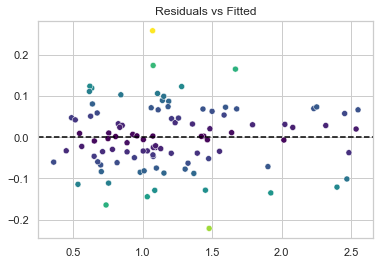

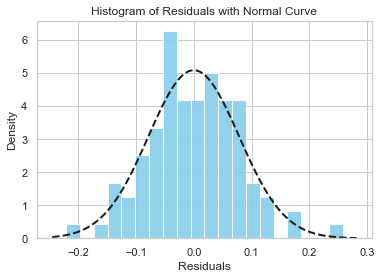

In [ ]:
###############################################################
# Workshop: Linear Mixed Models (LMM) in Python
# Example: Tree growth of evergreen vs. deciduous species
###############################################################

# Research Question:
# Do evergreen species grow more or less than deciduous species,
# while accounting for tree height and species-level variation?

# Hypotheses:
# H0: Evergreen and deciduous species show no difference in growth.
# H1: Evergreen and deciduous species differ in growth rates.

###############################################################
# 1) Libraries
###############################################################
!pip install -U pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro, levene, norm



In [ ]:
###############################################################
# 2) Import and Explore the Data
###############################################################

# Adjust path to your dataset
dataset = pd.read_csv("Q:\\06_Carine\\04_Statistics\\05_Workshop\\script_R\\tree_dataset.csv", sep=";")

# Quick look
print(dataset.head())
print(dataset.describe())
print(dataset['sp'].unique())
print(dataset['pft'].unique())



In [ ]:
###############################################################
# 3) Exploratory Plots
###############################################################

sns.set_theme(style="whitegrid")

# Boxplot: Growth by PFT
plt.figure(figsize=(6,4))
sns.boxplot(data=dataset, x="pft", y="growth",
            palette={"evergreen":"darkgreen","deciduous":"saddlebrown"})
plt.title("a) Tree Growth by Plant Functional Type")
plt.show()

# Boxplot: Growth by species
plt.figure(figsize=(10,4))
sns.boxplot(data=dataset, x="sp", y="growth", hue="pft",
            palette={"evergreen":"darkgreen","deciduous":"saddlebrown"})
plt.title("b) Tree Growth Distribution by Species")
plt.show()

# Scatter: Growth vs Height (by PFT)
plt.figure(figsize=(6,4))
sns.scatterplot(data=dataset, x="height", y="growth", hue="pft",
                palette={"evergreen":"darkgreen","deciduous":"saddlebrown"})
plt.title("c) Tree Growth by Height (PFT)")
plt.show()

# Scatter: Growth vs Height (by species)
plt.figure(figsize=(8,4))
sns.scatterplot(data=dataset, x="height", y="growth", hue="sp", palette="tab20")
plt.title("d) Tree Growth by Height (Species)")
plt.show()



In [ ]:
###############################################################
# 4) Baseline Linear Model (no random effects)
###############################################################
lm_fixed = smf.ols("growth ~ height + C(pft)", data=dataset).fit()
print(lm_fixed.summary())



In [4]:
###############################################################
# 5) Linear Mixed-Effects Models
###############################################################
from statsmodels.regression.mixed_linear_model import MixedLM
from scipy.stats import chi2

# Full mixed model: random intercept + slope
print("\n=== Full Mixed Model: Random Intercept + Slope ===")
md = MixedLM.from_formula("growth ~ height * C(pft)", 
                          groups="sp", 
                          re_formula="~height", 
                          data=dataset)
lmm_full = md.fit(reml=True)
print(lmm_full.summary())

# Random intercept only
print("\n=== Random Intercept Only Model ===")
md_ri = MixedLM.from_formula("growth ~ height * C(pft)", 
                             groups="sp", 
                             re_formula="1", 
                             data=dataset)
lmm_ri = md_ri.fit(reml=True)
print(lmm_ri.summary())

# Compare models (likelihood ratio test)
lr_stat = 2*(lmm_full.llf - lmm_ri.llf)
pval = chi2.sf(lr_stat, df=1)
print("\n=== Likelihood Ratio Test (Full vs Random Intercept) ===")
print("LR statistic =", lr_stat, "p-value =", pval)

# Drop interaction
print("\n=== Model Without Interaction (height:pft) ===")
md_no_int = MixedLM.from_formula("growth ~ height + C(pft)", 
                                 groups="sp", 
                                 re_formula="~height",
                                 data=dataset)
lmm_no_int = md_no_int.fit()
print(lmm_no_int.summary())

# Drop PFT
print("\n=== Model Without PFT ===")
md_no_pft = MixedLM.from_formula("growth ~ height", 
                                 groups="sp", 
                                 re_formula="~height",
                                 data=dataset)
lmm_no_pft = md_no_pft.fit()
print(lmm_no_pft.summary())

# Drop height
print("\n=== Model Without Height ===")
md_no_height = MixedLM.from_formula("growth ~ C(pft)", 
                                    groups="sp", 
                                    re_formula="~height",
                                    data=dataset)
lmm_no_height = md_no_height.fit()
print(lmm_no_height.summary())

###############################################################
# Final Model (example = no interaction)
###############################################################
print("\n=== Final Model (No Interaction) ===")
final_model = lmm_no_int
print(final_model.summary())



=== Full Mixed Model: Random Intercept + Slope ===


C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Li

                Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      growth 
No. Observations:       100          Method:                  REML   
No. Groups:             10           Scale:                   0.0068 
Min. group size:        10           Log-Likelihood:          52.2946
Max. group size:        10           Converged:               No     
Mean group size:        10.0                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.121    0.104  1.160 0.246 -0.083  0.325
C(pft)[T.evergreen]         0.368    0.144  2.566 0.010  0.087  0.650
height                      0.057    0.051  1.107 0.268 -0.044  0.157
height:C(pft)[T.evergreen] -0.011    0.072 -0.149 0.882 -0.153  0.131
sp Var                      0.038   

C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


         Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  growth 
No. Observations:  100      Method:              REML   
No. Groups:        10       Scale:               0.0072 
Min. group size:   10       Log-Likelihood:      56.8200
Max. group size:   10       Converged:           No     
Mean group size:   10.0                                 
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       0.314    0.073 4.299 0.000  0.171  0.458
height          0.051    0.020 2.533 0.011  0.011  0.090
sp Var          0.039    0.225                          
sp x height Cov 0.000    0.069                          
height Var      0.004                                   


=== Model Without Height ===
            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   growth 
No. Observat

C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 10.329532
  warnings.warn(msg, ConvergenceWarning)
C:\Users\klauberg\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\klauberg\AppData\Roaming\Python\Python39\site

In [ ]:
###############################################################
# 6) Diagnostics
###############################################################
resid = final_model.resid
fitted = final_model.fittedvalues

# Shapiro-Wilk test
print("Shapiro-Wilk:", shapiro(resid))

# Levene’s test (homogeneity across PFT)
groups = [resid[dataset['pft']=="deciduous"], resid[dataset['pft']=="evergreen"]]
print("Levene’s test:", levene(*groups))

# Residuals vs Fitted
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, hue=np.abs(resid), palette="viridis", legend=False)
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram of residuals + normal curve
plt.figure(figsize=(6,4))
plt.hist(resid, bins=20, density=True, color="skyblue", edgecolor="white", alpha=0.9)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, norm.pdf(x, resid.mean(), resid.std()), "k--", lw=2)
plt.title("Histogram of Residuals with Normal Curve")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()




In [ ]:
###############################################################
# 7) Predictions
###############################################################
dataset["pred_full"] = final_model.fittedvalues
dataset["pred_fixed"] = final_model.predict(exog=final_model.model.exog)

plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x="height", y="growth", hue="sp", palette="tab20", alpha=0.7)
sns.lineplot(data=dataset, x="height", y="pred_full", hue="sp", 
             palette="tab20", linestyle="--", legend=False)
sns.lineplot(data=dataset, x="height", y="pred_fixed", hue="pft", 
             palette={"deciduous":"saddlebrown","evergreen":"darkgreen"})
plt.title("Observed vs Predicted Growth")
plt.show()

###############################################################
# END OF WORKSHOP
###############################################################
